# Distribuciones de probabilidad

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

## 1. Distrución de probabilidad uniforme
$X\sim U(a,b)$ Parámetros  $a,b \rightarrow $ intervalo
$$\textbf{Función de densidad de probabilidad}\\f(x)=\begin{cases}\frac{1}{b-a} & a\leq x \leq b\\0& \text{otro caso}\end{cases}$$ 
$$ \textbf{Función de distribución de probabilidad}\\F(x)=\begin{cases}0& x<a\\\frac{x-a}{b-a} & a\leq x \leq b\\1& x\geq b\end{cases}$$
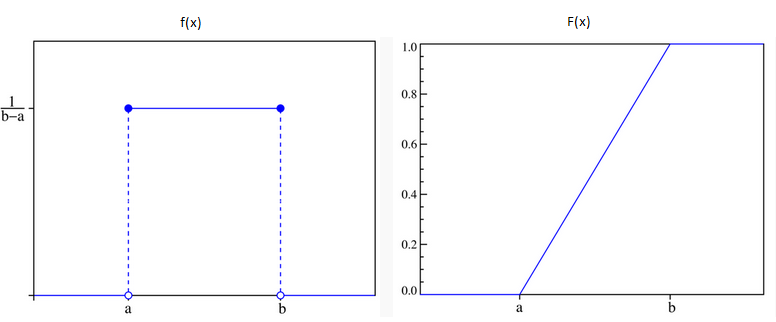

### Uso en python

In [12]:
a,b=1,2 # Interval
U = np.random.uniform(a,b)
U

1.5101151430612667

## 2. Distribución normal
$X\sim N(\mu,\sigma^2)$ Parámetros: Media=$\mu$ y varianza=$\sigma^2$
$$ \textbf{Función de densidad de probabilidad}\\ f(x)= \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$
$$ \textbf{Función de distribución de probabilidad}\\ F(x)= \frac{1}{\sigma\sqrt(2\pi)}\int_{-\infty}^{x}e^{\frac{-(v-\mu)^2}{2\sigma^2}}dv$$
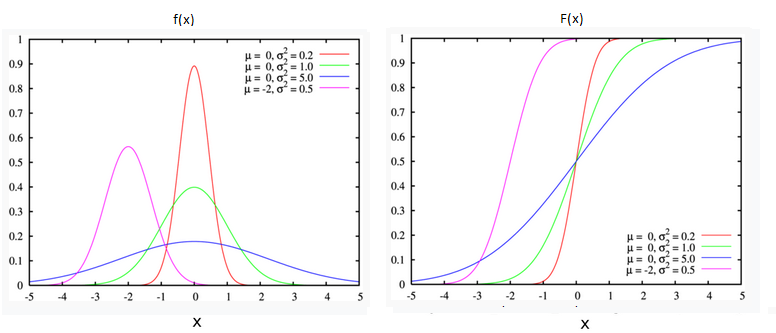


### Propiedades
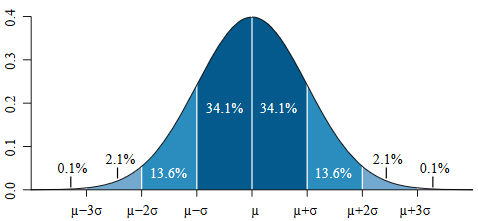

### Estandarización de variables aleatorias normales

Como consecuencia de que la función normal es simétrica en $\mu$ es posible relacionar todas las variables aleatorias normales con la distribución normal estándar.

Si $X\sim N(\mu ,\sigma ^{2})$, entonces
$$Z = \frac{X - \mu}{\sigma}$$

es una variable aleatoria normal estándar: $Z\sim N(0,1)$.

### El Teorema del Límite Central
El Teorema del límite central establece que bajo ciertas condiciones (como pueden ser independientes e idénticamente distribuidas con varianza finita), la suma de un gran número de variables aleatorias se distribuye aproximadamente como una normal. **(Hablar de la importancia del uso)**

### Incidencia
Cuando en un fenómeno se sospecha la presencia de un gran número de pequeñas causas actuando de forma aditiva e independiente es razonable pensar que las observaciones serán "normales". **(Debido al TLC)** 

Hay causas que pueden actuar de forma multiplicativa (más que aditiva). En este caso, la suposición de normalidad no está justificada y es el logaritmo de la variable en cuestión el que estaría normalmente distribuido. **(log-normal)**.

### Ejemplo de aplicación
En variables financieras, el modelo de Black-Scholes, el cúal es empleado para estimar el valor actual de una opción europea para la compra (Call), o venta (Put), de acciones en una fecha futura, supone normalidad en algunas variables económicas. ver:https://es.wikipedia.org/wiki/Modelo_de_Black-Scholes  para información adicional.

> Referencia: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

### Uso en python

In [17]:
mu, sigma = 0, 0.1 # mean and standard deviation
N = np.random.normal(mu, sigma,5)
N

array([-0.19380435, -0.06132069,  0.08167347, -0.06161148, -0.03165598])

## 3. Distribución exponencial
$X\sim Exp(\beta)$ Parámetros: Media $\beta>0$ o tasa = $\lambda = 1/\beta$

$$\textbf{Función de densidad de probabilidad}\\f(x) = \frac{1}{\beta} e^{-\frac{x}{\beta}}$$
$$\textbf{Función de distribución de probabilidad}\\F(x) = 1-e^{-\frac{x}{\beta}}$$
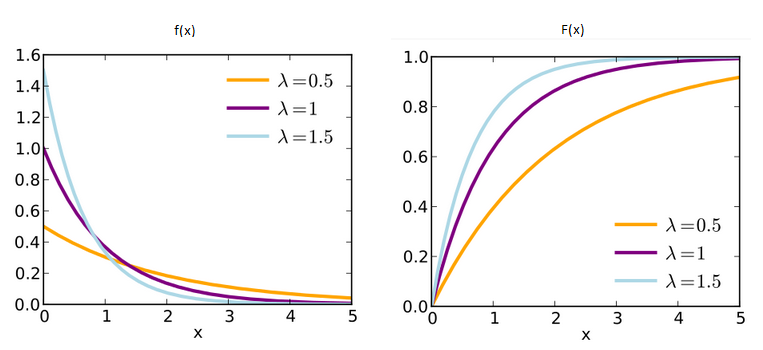

### Ejemplos
Ejemplos para la distribución exponencial **es la distribución de la longitud de los intervalos de una variable continua que transcurren entre dos sucesos**, que se distribuyen según la distribución de Poisson.

   - El tiempo transcurrido en un centro de llamadas hasta recibir la primera llamada del día se podría modelar como una exponencial.
   - El intervalo de tiempo entre terremotos (de una determinada magnitud) sigue una distribución exponencial.
   - Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.
   - En fiabilidad de sistemas, un dispositivo con tasa de fallo constante sigue una distribución exponencial.
   
### Relaciones
La suma de k  variables aleatorias independientes de distribución exponencial con parámetro $\lambda$ es una variable aleatoria de distribución de Erlang.

> Referencia: https://en.wikipedia.org/wiki/Exponential_distribution

### Uso en python

In [19]:
beta = 4
E = np.random.exponential(beta,1)
E

array([3.94145274])

## 4. Distribución erlang
Parámetros: Tamaño $k \in \mathbb{N}$, escala=$\frac{1}{\beta}$
$$\textbf{Función de densidad de probabilidad}\\f(x)=x^{k-1}\frac{e^{-x/\beta}}{\beta^k\Gamma(k)}\equiv x^{k-1}\frac{e^{-x/\beta}}{\beta^k(k-1)!}$$

$$\textbf{Función de distribución de probabilidad}\\F(x)=1-\sum_{n=0}^{k-1}\frac{1}{n!}e^{-\frac{1}{\beta}x}\big(\frac{x}{\beta}\big)^n$$
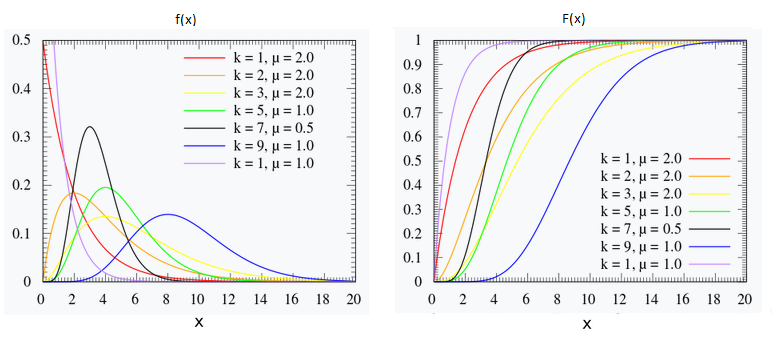

### Simplificaciones
La distribución Erlang con tamaño $k=1$ se simplifica a una distribución exponencial. Esta es una distribución de la suma de $k$ variables exponenciales donde cada una tiene media $\beta$ 

### Ocurrencia
**Tiempos de espera**

Los eventos que ocurren de forma independiente con una tasa promedio se modelan con un proceso de Poisson. Los tiempos de espera entre k ocurrencias del evento son distribuidos Erlang. (La cuestión relacionada con el número de eventos en una cantidad de tiempo dada descrita por una distribución de Poisson).

Las fórmulas de Erlang se han utilizado en economía de negocios para describir los tiempos entre compras de un activo.

> Referencia: https://en.wikipedia.org/wiki/Erlang_distribution

### Uso en python

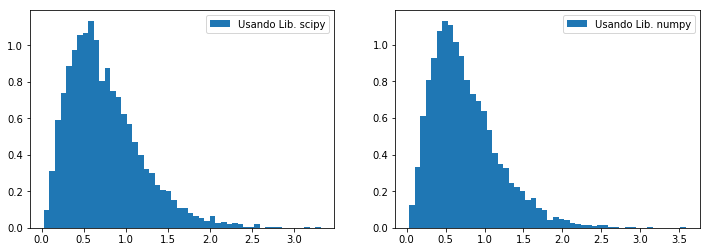

In [35]:
from scipy.stats import erlang
N = 10000        # Número de muestras
k,scale = 3,1/4 # Parámetros de la distribución 

E1 = erlang.rvs(k,scale=scale,size=N)
E2 = np.random.gamma(k,scale,N)   # Erlang como caso particular de la distribución gamma

plt.figure(1,figsize=[12,4])
plt.subplot(121)
plt.hist(E1,50,density=True,label='Usando Lib. scipy')
plt.legend()
plt.subplot(122)
plt.hist(E2,50,density=True,label='Usando Lib. numpy')
plt.legend()
plt.show()

## 5. Distribución binomial
$X\sim B(n,p)$ Parámetros: $n$ y $p$
$$\textbf{Función de densidad de probabilidad}\\p_i=P(X=i)={n \choose i}p^i(1-p)^{n-i}= \frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
>Recordar:$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

$$\textbf{Función de distribución de probabilidad}\\F(x)=\sum_{i=0}^{k-1}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$

## Método convencional 

In [3]:
def proba_binomial(n:'Cantidad de ensayos',N:'Cantidad de puntos a graficar',
                   p:'Probabilidad de los eventos'):
    pi = [(1-p)**n]
    add = pi.append
    for i in range(N-1):
        add(((n-i)*p*pi[-1])/((i+1)*(1-p)))
    return pi

## Método vectorizado

In [4]:
def proba_binomial_vect(n:'Cantidad de ensayos',
                        N:'Cantidad de puntos a graficar',
                        p:'Probabilidad de los eventos'):
    global pi
    pi = np.zeros(N);
    pi[0] = (1-p)**n
    def probability_vector(i:'Contador para llenar el vector pi'):
        global pi
        pi[i+1]= ((n-i)*p*pi[i])/((i+1)*(1-p))
    [probability_vector(j) for j in range(N-1)]
    return pi

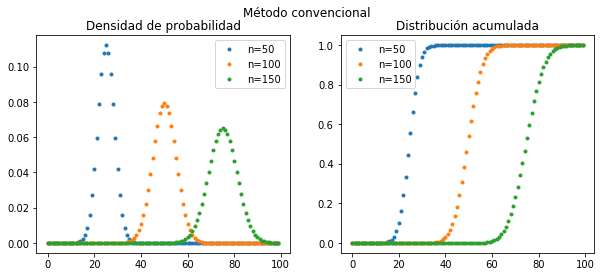

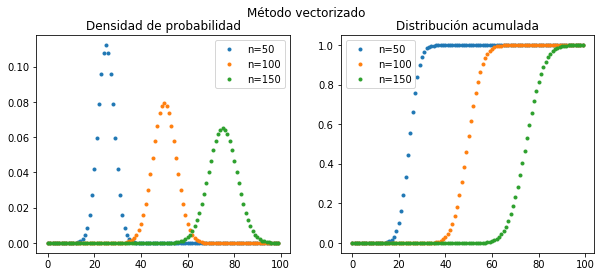

In [29]:
# Comprobación de función creada
# Distintos parámetros para graficar la función binomial
n = [50,100,150]
# Parámetro p de la dristribución
p = 0.5
# Resultado usando método convencional
P = list(map(lambda x,n: proba_binomial(n,100,p),range(len(n)),n))
P = np.asmatrix(P)

# # Resultado usando método vectorizado
P2 = list(map(lambda x,n:proba_binomial_vect(n,100,p), range(len(n)),n))
P2 = np.array(P2,ndmin=1)

def grafica_binomial(P:'Matriz de probabilidades binomiales',i):
    # Gráfica de densidad de probabilidad
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_figwidth(10)
    ax1.plot(P.T,'o',markersize=3)
    ax1.legend(['n=50','n=100','n=150'])
    ax1.set_title('Densidad de probabilidad')
    # ax1.show()

    # Probabilidad acumulada
    F = np.cumsum(P,axis=1)
    # plt.figure(2)
    ax2.plot(F.T,'o',markersize=3)
    ax2.legend(['n=%d'%n[0],'n=%d'%n[1],'n=%d'%n[2]])
    ax2.set_title('Distribución acumulada')
    
    if i==0:
        plt.suptitle('Método convencional')
    else:
        plt.suptitle('Método vectorizado')
    plt.show()
    
# Gráfica del método convencional y vectorizado
[grafica_binomial(p,i) for p,i in zip([P,P2],range(3))];

### Características
La distribución binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de **n ensayos de Bernoulli independientes entre sí**, con una probabilidad fija p de ocurrencia del éxito entre los ensayos. A lo que se denomina «éxito», tiene una probabilidad de ocurrencia p y al otro, «fracaso», tiene una probabilidad q = 1 - p. En la distribución binomial el anterior experimento se repite n veces, de forma independiente, y se designa por $X$ a la variable que mide el número de éxitos que se han producido en los n experimentos. 

Cuando se dan estas circunstancias, se dice que la variable $X$ sigue una distribución de probabilidad binomial, y se denota $X\sim B(n,p)$.

### Ejemplo
Supongamos que se lanza un dado (con 6 caras) 51 veces y queremos conocer la probabilidad de que el número 3 salga 20 veces. En este caso tenemos una $X \sim B(51, 1/6)$ y la probabilidad sería $P(X=20)$:

$$P(X=20)={51 \choose 20}(1/6)^{20}(1-1/6)^{51-20} $$

In [78]:
n = 100; p=1/6; X=20
print('P(X=20)=',st.binom(n,p).pmf(X))

P(X=20)= 0.06786199515844335


### Relaciones con otras variables aleatorias

Si n tiende a infinito y p es tal que el producto entre ambos parámetros tiende a $\lambda$, entonces la distribución de la variable aleatoria binomial tiende a una distribución de Poisson de parámetro $\lambda$.

Por último, se cumple que cuando $p =0.5$ y n es muy grande (usualmente se exige que $n\geq 30$) la distribución binomial puede aproximarse mediante la distribución normal, con parámetros $\mu=np,\sigma^2=np(1-p)$.

> Referencia: https://en.wikipedia.org/wiki/Binomial_distribution

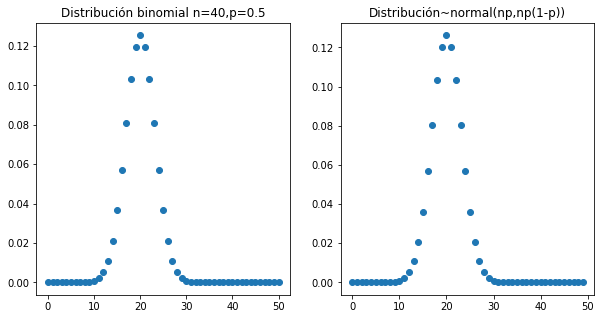

In [93]:
p = .5; n = 40
mu = n*p; sigma = np.sqrt(n*p*(1-p))
# Usando nuetra función creada
Bi = proba_binomial(n,50,p)
plt.figure(1,figsize=[10,5])
plt.subplot(121)
plt.plot(Bi,'o')
plt.title('Distribución binomial n=40,p=0.5')
# Usando la función de la librería scipy para graficar la normal
x = np.arange(0,50)
Bi_norm = st.norm.pdf(x,loc=mu,scale=sigma)
plt.subplot(122)
plt.plot(Bi_norm,'o')
plt.title('Distribución~normal(np,np(1-p))')
plt.show()

## 6. Distribución Poisson
Parámetros: media=$\lambda>0 \in \mathbb{R}$, N°Ocurrencias = k

   - k es el número de ocurrencias del evento o fenómeno (la función nos da la probabilidad de que el evento suceda precisamente k veces).
   - λ es un parámetro positivo que representa el número de veces que se espera que ocurra el fenómeno durante un intervalo dado. Por ejemplo, si el suceso estudiado tiene lugar en promedio 4 veces por minuto y estamos interesados en la probabilidad de que ocurra k veces dentro de un intervalo de 10 minutos, usaremos un modelo de distribución de Poisson con λ = 10×4 = 40

$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

### Aplicación
El número de sucesos en un intervalo de tiempo dado es una variable aleatoria de distribución de Poisson donde $\lambda$ es la media de números de sucesos en este intervalo.

### Relación con distribución Erlang o Gamma
El tiempo hasta que ocurre el suceso número k en un proceso de Poisson de intensidad $\lambda$ es una variable aleatoria con distribución gamma o (lo mismo) con distribución de Erlang con $ \beta =1/\lambda $

### Aproximación normal
Como consecuencia del teorema central del límite, para valores grandes de $\lambda$ , una variable aleatoria de Poisson X puede aproximarse por otra normal, con parámetros $\mu=\sigma^2=\lambda$. Por otro lado, si el cociente 
$$Y=\frac{X-\lambda}{\sqrt{\lambda}}$$
converge a una distribución normal de media 0 y varianza 1.

### Ejemplo
Si el 2% de los libros encuadernados en cierto taller tiene encuadernación defectuosa, para obtener la probabilidad de que 5 de 400 libros encuadernados en este taller tengan encuadernaciones defectuosas usamos la distribución de Poisson. En este caso concreto, k es 5 y, λ, el valor esperado de libros defectuosos es el 2% de 400, es decir, 8. Por lo tanto, la probabilidad buscada es
$$P(5;8)={\frac {8^{5}e^{-8}}{5!}}=0,092$$

> Referencia: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [32]:
k=5; Lamda = 8
print('P(5;8)=',st.poisson(Lamda).pmf(k))

P(5;8)= 0.09160366159257921


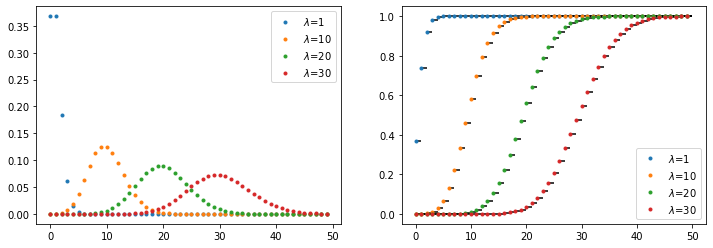

In [34]:
import scipy.special as sps 

p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k+1)
k = np.arange(0,50)
l = [1,10,20,30]
P = np.asmatrix(list(map(lambda x:p(k,x*np.ones(len(k))),l))).T

plt.figure(1,figsize=[12,4])
plt.subplot(121)
plt.plot(P,'o',markersize=3)
plt.legend(['$\lambda$=%d'%i for i in l])

# Probabilidad acumulada 
P_ac = np.cumsum(P,axis=0)

plt.subplot(122)
plt.plot(P_ac,'o',markersize=3)
[plt.hlines(P_ac[:,i],range(len(P_ac)),range(1,len(P_ac)+1)) for i in range(len(l))]
plt.legend(['$\lambda$=%d'%i for i in l])
plt.show()

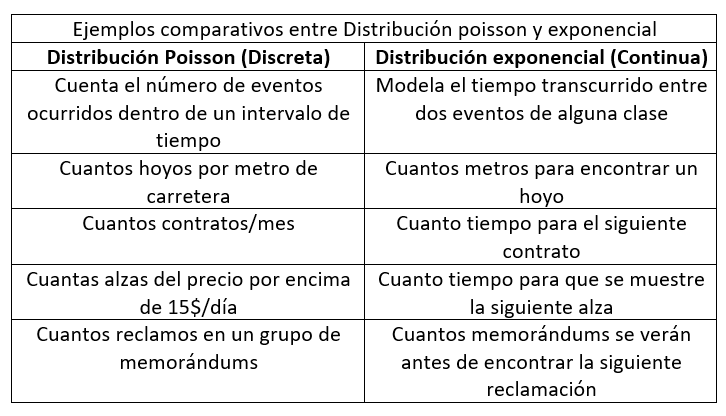

## 7. Distribuciónn triangular
Parámetros: 
   - a : $a\in (-\infty ,\infty)$
   - b : $b > a$ 
   - c : $a\leq c\leq b$
   - Soporte: $a\leq x\leq b$ 

$$\textbf{Función de densidad de probabilidad}\\f(x|a,b,c)={\begin{cases}{\frac {2(x-a)}{(b-a)(c-a)}}&{\text{para }}a\leq x<c,\\[4pt]{\frac {2}{b-a}}&{\text{para }}x=c,\\[4pt]{\frac {2(b-x)}{(b-a)(b-c)}}&{\text{para }}c<x\leq b,\\[4pt]0&{\text{para otros casos}}\end{cases}}$$


$$\textbf{Función de distribución de probabilidad}\\F(x|a,b,c)={\begin{cases}{0}&{\text{para }}x\leq a,\\[4pt]{\frac {(x-a)^2}{(b-a)(c-a)}}&{\text{para }}a< x\leq c,\\[4pt]{1-\frac{(b-x)^2}{(b-a)(b-c)}}&{\text{para }}c<x< b,\\[4pt]1&{\text{para }}b\leq x\end{cases}}$$

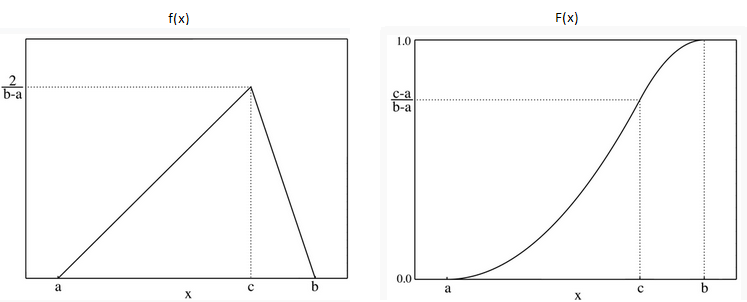

### Uso de la distribución triangular
La distribución triangular es habitualmente empleada como una descripción subjetiva de una población para la que sólo se cuenta con una cantidad limitada de datos muestrales y, especialmente en casos en que la relación entre variables es conocida pero los **datos son escasos** (posiblemente porque es alto el costo de recolectarlos). Está basada en un conocimiento del mínimo y el máximo como el del valor modal. Por estos motivos, la Distribución Triangular ha sido denominada como la de "falta de precisión" o de información.

> Referencia: https://en.wikipedia.org/wiki/Triangular_distribution

# <font color ='red'> Tarea (Opcional)
Generar valores aleatorios para la siguiente distribución de probabilidad
    $$f(x)=\begin{cases}\frac{2}{(c-a)(b-a)}(x-a), & a\leq x \leq b\\ \frac{-2}{(c-a)(c-b)}(x-c),& b\leq x \leq c \end{cases}$$ con a=1; b=2; c=5
1. Usando el método de la transformada inversa.
2. Usando el método de aceptación y rechazo.
3. En la librería `import scipy.stats as st` hay una función que genera variables aleatorias triangulares `st.triang.pdf(x, c, loc, scale)` donde "c,loc,scale" son los parámetros de esta distribución (similares a los que  nuestra función se llaman a,b,c, PERO NO IGUALES). Explorar el help de python para encontrar la equivalencia entre los parámetros "c,loc,scale" y los parámetros de nuestra función con parámetros "a,b,c". La solución esperada es como se muestra a continuación:
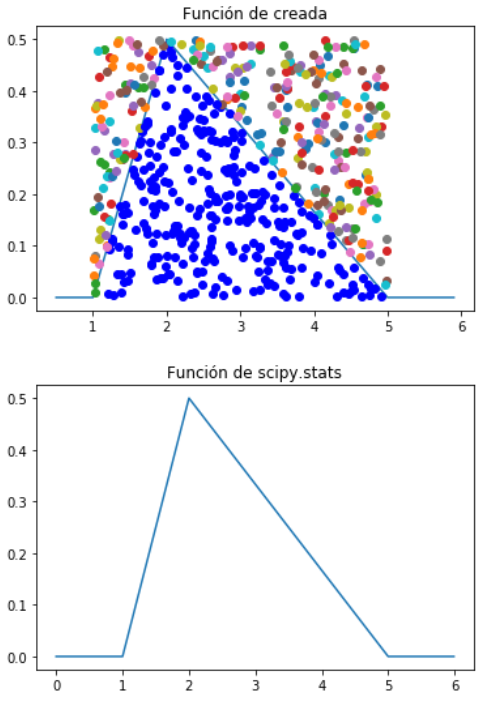

4. Generar 1000 variables aleatorias usando la función creada en el punto 2 y usando la función `st.triang.rvs` y graficar el histograma en dos gráficas diferentes de cada uno de los conjuntos de variables aleatorios creado. Se espera algo como esto:


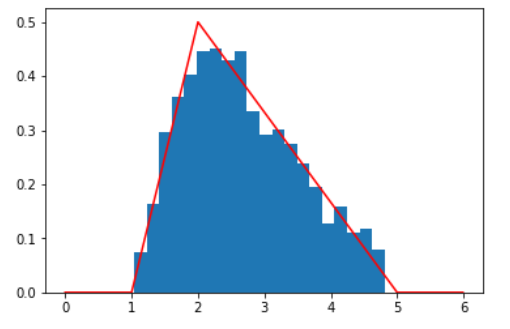

### La pongo como opcional por que puede aparecer en un quiz o un examen.

# <font color ='red'>Tarea distribuciones de probabilidad:</font>

La tarea debe de realizarse en grupos, los cuales están nombrados en la siguiente tabla. La tarea consiste en modificar una de las páginas que corresponde a el grupo conformado, por ejemplo si eres el grupo 1, debes de modificar la página que corresponde a tu grupo, no ninguna de las otras páginas. En dicha página les voy a pedir que en una breve exposición, de aproximadamente 5 a 7 minutos, la próxima clase martes 1 de octubre, expongan sus respectivas consultas aceca de cada una de las distribuciones de probabilidad asignadas. Lo que necesito que consulten es:

1. Explicación del uso de cada distribución de probabilidad.

2. Utilizar recursos audiovisuales, como videos, tablas, gifts, imágenes, enlace externos, etc, los cuales desde esta plataforma de canvas es posible introducir, en donde expliquen de la forma mas amigable y simple posible, las aplicaciones  aplicaciones y usos de las distribuciones de probabilidad asignadas.

3. Consultar en libros, internet, aplicaciones de como usar dichas distribuciones y por qué usarlas.

4. También pueden poner la descripción matemática de dischas distribuciones. Noten que pueden ingresar código latex para poder ingresar ecuaciones y demás.

La calificación estará basada, en la creatividad y el manejo que tengan de cada una de sus distribuciones de probabilidad a la hora de la exposición.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga
</footer>